In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, tqdm
import seaborn as sns

In [3]:
# metadata_df = pd.read_csv("/kaggle/input/nasa-battery-dataset/cleaned_dataset/metadata.csv")
# metadata_df

In [4]:
# metadata_df[metadata_df['battery_id']=='B0048'].head(30)

In [5]:
# discharge_df = pd.DataFrame()
# charge_df = pd.DataFrame()

# folder_path = '/kaggle/input/nasa-battery-dataset/cleaned_dataset/data/'

# for index, row in tqdm.tqdm(metadata_df.iterrows()):
#     file_name = row['filename']
#     battery_id = row['battery_id']
#     charge_cycle, discharge_cycle = 0, 0
#     file_path = os.path.join(folder_path, file_name)
#     file_df = pd.read_csv(file_path)
    
#     file_df['battery_id'] = battery_id
#     if row['type']!='impedance':
#         final_time = file_df.Time.iloc[-1]
#         file_df['RUL'] = final_time - file_df['Time']
    
    
#     if row['type'] == 'discharge':
#         discharge_cycle += 1
#         file_df['cycle'] = discharge_cycle
#         discharge_df = pd.concat([discharge_df, file_df], ignore_index=True)
#     elif row['type'] == 'charge':
#         charge_cycle += 1
#         file_df['cycle'] = charge_cycle
#         charge_df = pd.concat([charge_df, file_df], ignore_index=True)

# print("Discharge DataFrame:")
# print(discharge_df.head())

# print("\nCharge DataFrame:")
# print(charge_df.head())


In [6]:
# discharge_df

In [7]:
# charge_df

In [8]:
# discharge_df.to_csv("discharge.csv")
# charge_df.to_csv("charge.csv")

In [9]:
data = pd.read_csv("/kaggle/input/nasa-battery-dataset/cleaned_dataset/data/00001.csv")
data

,Voltage_measured,Current_measured,Temperature_measured,Current_load,Voltage_load,Time
0,4.246711,0.000252,6.212696,0.0002,0.000,0.000
1,4.246764,-0.001411,6.234019,0.0002,4.262,9.360
2,4.039277,-0.995093,6.250255,1.0000,3.465,23.281
3,4.019506,-0.996731,6.302176,1.0000,3.451,36.406
4,4.004763,-0.992845,6.361645,1.0000,3.438,49.625
...,...,...,...,...,...,...
485,3.303251,-0.001760,9.662331,0.0004,0.000,6382.063
486,3.310303,-0.000756,9.390489,0.0002,0.000,6395.547
487,3.317351,-0.003318,9.137008,0.0002,0.000,6409.063
488,3.323387,-0.002291,8.972806,0.0002,0.000,6422.625


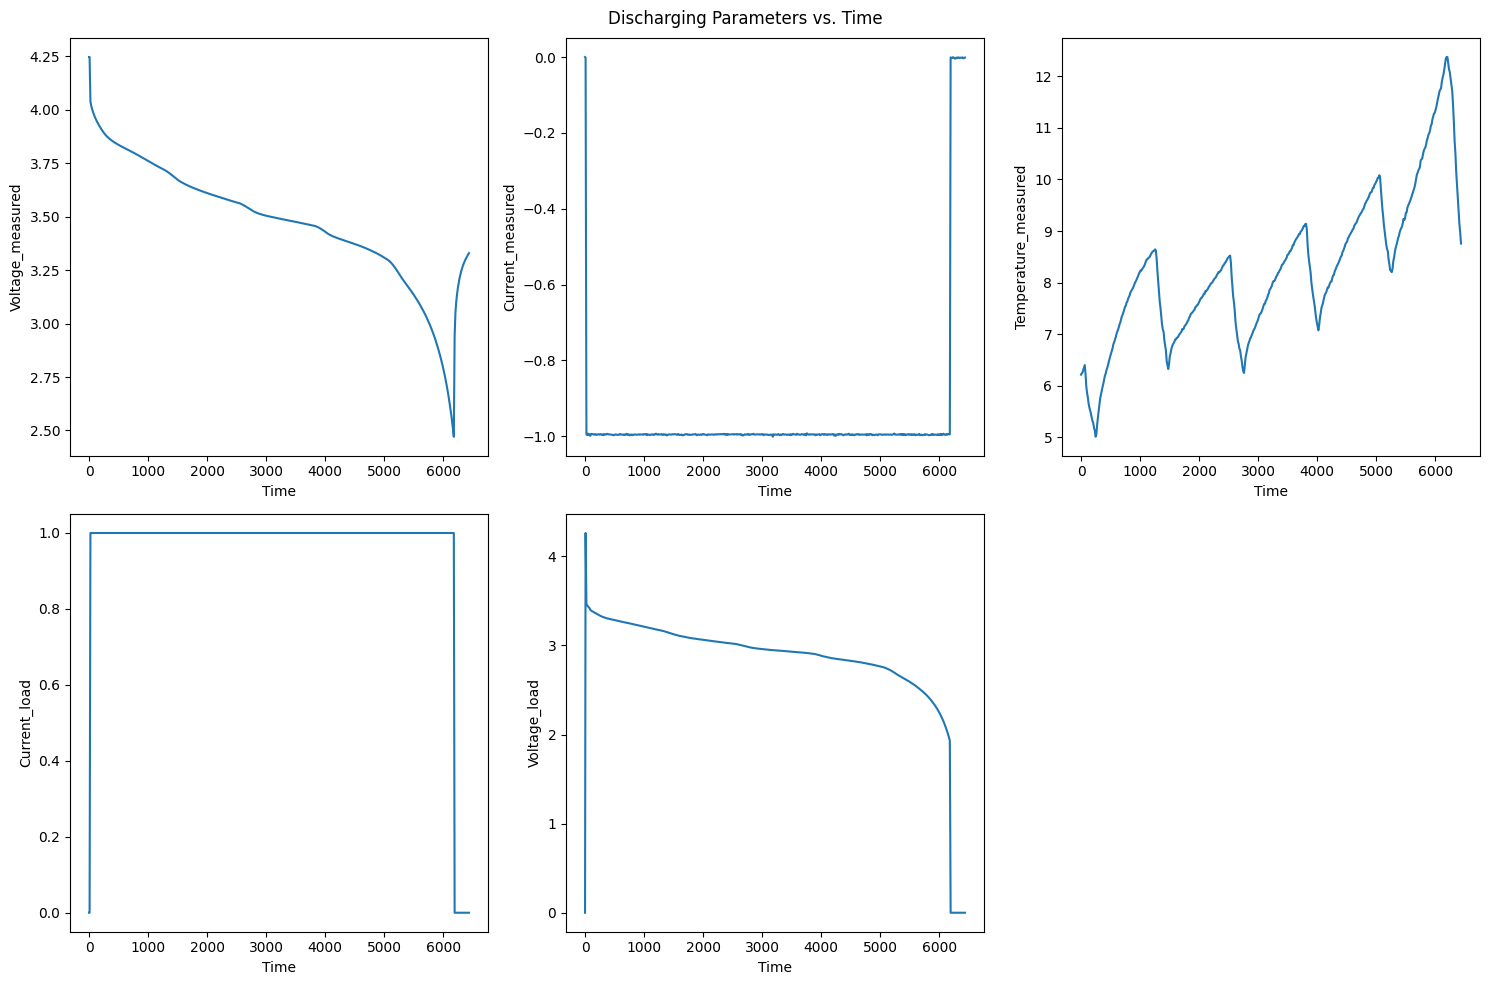

In [10]:
df = pd.DataFrame(data)

# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
columns = data.columns

# Plot each parameter against time
sns.lineplot(x='Time', y=columns[0], data=df, ax=axes[0, 0])
sns.lineplot(x='Time', y=columns[1], data=df, ax=axes[0, 1])
sns.lineplot(x='Time', y=columns[2], data=df, ax=axes[0, 2])
sns.lineplot(x='Time', y=columns[3], data=df, ax=axes[1, 0])
sns.lineplot(x='Time', y=columns[4], data=df, ax=axes[1, 1])

# Remove empty subplot
fig.delaxes(axes[1, 2])
plt.suptitle('Discharging Parameters vs. Time')

plt.tight_layout()
plt.show()

In [11]:
def plot_test_data(df, profile="charge"):
    
    if profile=='charge':
        plt.figure(figsize=(10,4))
        plt.plot(df.Time, df.Voltage_measured, 'b', label='Voltage_measured')
        plt.plot(df.Time, df.Current_measured, 'r', label='Current_measured')
        plt.legend()
        plt.show()

        plt.figure(figsize=(10,4))
        plt.plot(df.Time, df.Voltage_charge, 'b', label='Voltage_charge')
        plt.plot(df.Time, df.Current_charge, 'r', label='Current_charge')
        plt.legend()
        plt.show()

        plt.figure(figsize=(10,4))
        plt.plot(df.Time, df.Temperature_measured, 'k', label='Temperature_measured')
        plt.legend()
        plt.show()
    elif profile=='discharge':
        plt.figure(figsize=(10,4))
        plt.plot(df.Time, df.Voltage_measured, 'b', label='Voltage_measured')
        plt.plot(df.Time, df.Current_measured, 'r', label='Current_measured')
        plt.legend()
        plt.show()

        plt.figure(figsize=(10,4))
        plt.plot(df.Time, df.Voltage_load, 'b', label='Voltage_load')
        plt.plot(df.Time, df.Current_load, 'r', label='Current_load')
        plt.legend()
        plt.show()

        plt.figure(figsize=(10,4))
        plt.plot(df.Time, df.Temperature_measured, 'k', label='Temperature_measured')
        plt.legend()
        plt.show()
    elif profile=='impedance':
        pass
    else:
        print('No cycle recognized')

In [12]:
plot_test_data(charge_df[charge_df['battery_id']=='B0047'], profile='charge')

NameError: name 'charge_df' is not defined

In [ ]:
plot_test_data(data, profile='discharge')

In [ ]:
from sklearn.model_selection import train_test_split

df = pd.read_csv("/kaggle/input/nasa-battery-dataset-agg/charge.csv")
df = df.dropna()
train, test = train_test_split(df, test_size=0.5, random_state=42)

drop_cols = [df.columns[0], 'RUL', 'battery_id']


train_y = train['RUL']
train_X = train.drop(drop_cols, axis=1)

test_y = test['RUL']
test_X = test.drop(drop_cols, axis=1)

In [ ]:
train_X

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

model = RandomForestRegressor(random_state=0)
model.fit(train_X, train_y)

preds = model.predict(test_X)
mae = mean_absolute_error(test_y, preds)
r2 = r2_score(test_y, preds)
print(f"MAE: {mae}")
print(f"R2S: {r2}")

# get feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(train_X.shape[1]):
    print(f"{train_X.columns[indices[f]]}: {importances[indices[f]]}")

# plot test_y, preds
plt.scatter(test_y, preds)
plt.plot(test_y, test_y)
# plt.savefig("rul_nasa.png")

df.isna().sum()

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score


# Instantiate XGBoost model
model = XGBRegressor(random_state=0)

# Fit model
model.fit(train_X, train_y)

# Predictions
preds = model.predict(test_X)

# Evaluation
mae = mean_absolute_error(test_y, preds)
r2 = r2_score(test_y, preds)
print(f"MAE: {mae}")
print(f"R2S: {r2}")

# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(train_X.shape[1]):
    print(f"{train_X.columns[indices[f]]}: {importances[indices[f]]}")

# Plotting test_y vs. preds
plt.scatter(test_y, preds)
plt.plot(test_y, test_y)
plt.show()  # Display the plot
# plt.savefig("rul_nasa.png")


In [ ]:
from sklearn.svm import SVR

# Instantiate SVR model
model = SVR()

# Train-test split

# Fit model
model.fit(train_X, train_y)

# Predictions
preds = model.predict(test_X)

# Evaluation
mae = mean_absolute_error(test_y, preds)
r2 = r2_score(test_y, preds)
print(f"MAE: {mae}")
print(f"R2S: {r2}")


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score


# Instantiate KNeighborsRegressor model
model = KNeighborsRegressor()

# Train-test split

# Fit model
model.fit(train_X, train_y)

# Predictions
preds = model.predict(test_X)

# Evaluation
mae = mean_absolute_error(test_y, preds)
r2 = r2_score(test_y, preds)
print(f"MAE: {mae}")
print(f"R2S: {r2}")


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Reshape data for LSTM (assuming train_X, test_X, train_y, test_y are already defined)
train_X = train_X.values.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.values.reshape((test_X.shape[0], 1, test_X.shape[1]))

# # Normalize features
# scaler = MinMaxScaler()
# train_X = scaler.fit_transform(train_X)
# test_X = scaler.transform(test_X)

# Build LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))  # Output layer
model.compile(optimizer='adam', loss='mse')  # Mean Squared Error loss for regression

# Train the model
history = model.fit(train_X, train_y, epochs=10, batch_size=32, validation_data=(test_X, test_y), verbose=1)

# Make predictions
preds = model.predict(test_X)

# Evaluate the model
mae = mean_absolute_error(test_y, preds)
r2 = r2_score(test_y, preds)
print(f"MAE: {mae}")
print(f"R2S: {r2}")


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Evaluate the model
mae = mean_absolute_error(test_y, preds)
r2 = r2_score(test_y, preds)
print(f"MAE: {mae}")
print(f"R2S: {r2}")


In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the losses
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()